# EDA Dataset

In [1]:
# DataFrame
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from math import pi
from wordcloud import WordCloud
import matplotlib as mpl

%matplotlib inline

#Set Option
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline
plt.style.use('seaborn')

/Users/liuxingjian/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv('1_start_up_succes_or_not.csv')
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video di

# Select Valid Columns

<AxesSubplot:>

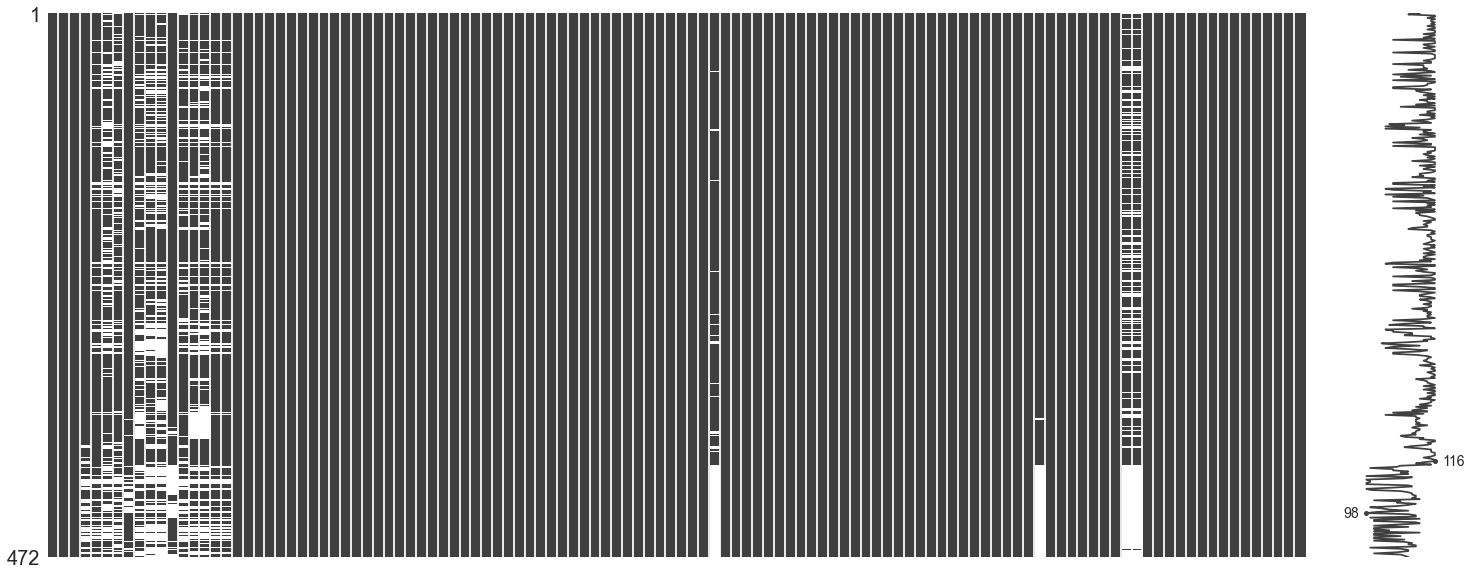

In [3]:
msno.matrix(df)

In [4]:
df_final=df[['Dependent-Company Status','Worked in top companies','Relevance of experience to venture',
            'Degree from a Tier 1 or Tier 2 university?','Relevance of education to venture',
            'Skills score','Employee Count','Employees count MoM change','Number of Co-founders','Number of of advisors',
            'Team size Senior leadership','Team size all employees','Number of Recognitions for Founders and Co-founders',
            'Highest education','Team Composition score','Industry of company','Employee benefits and salary structures',
            'Company awards','year of founding','Country of company','Continent of company']]

inv_data = df[['Dependent-Company Status','Investors','Number of Investors in Seed','Number of Investors in Angel and or VC','Number of of repeat investors',
                'Worked in top companies','Average size of companies worked for in the past','Was he or she partner in Big 5 consulting?',
                'Consulting experience?','Relevance of education to venture','Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?',
                'Renowned in professional circle','Experience in selling and building products','Experience in Fortune 100 organizations','Experience in Fortune 500 organizations',
                'Experience in Fortune 1000 organizations','Top management similarity','Skills score','Dificulty of Obtaining Work force']]

team_data = df[['Dependent-Company Status','Employee Count','Employees count MoM change','Has the team size grown','Number of Co-founders','Number of of advisors',
                     'Team size Senior leadership','Team size all employees','Average Years of experience for founder and co founder','Highest education',
                     'Specialization of highest education','Number of Recognitions for Founders and Co-founders','Number of  of Research publications',
                     'Team Composition score','Pricing Strategy','Long term relationship with other founders','Proprietary or patent position (competitive position)',
                     'Controversial history of founder or co founder','Legal risk and intellectual property']]

fund_data = df[['Last Funding Amount','Number of  Sales Support material','Exposure across the globe']]

func_data = df[['Dependent-Company Status','Internet Activity Score','Short Description of company profile',
                     'Industry of company','Focus functions of company','Presence of a top angel or venture fund in previous round of investment','Have been part of startups in the past?',
                     'Have been part of successful startups in the past?','Product or service company?','Catering to product/service across verticals','Subscription based business','Machine Learning based business','Predictive Analytics business',
                     'Prescriptive analytics business','Big Data Business','Cross-Channel Analytics/ marketing channels','Owns data or not? (monetization of data) e.g. Factual','Is the company an aggregator/market place? e.g. Bluekai',
                     'Online or offline venture - physical location based business or online venture?','B2C or B2B venture?','Top forums like \'Tech crunch\' or \'Venture beat\' talking about the company/model - How much is it being talked about?','Breadth of experience across verticals']]

power_data = df[['Dependent-Company Status','google page rank of company website','Technical proficiencies to analyse and interpret unstructured data','Solutions offered',
                     'Invested through global incubation competitions?','Industry trend in investing','Disruptiveness of technology','Breadth of experience across verticals',
                     'Percent_skill_Entrepreneurship','Percent_skill_Operations','Percent_skill_Engineering','Percent_skill_Marketing','Percent_skill_Leadership','Percent_skill_Data Science',
                     'Percent_skill_Business Strategy','Percent_skill_Product Management','Percent_skill_Sales','Percent_skill_Domain','Percent_skill_Law','Percent_skill_Consulting','Percent_skill_Finance',
                     'Percent_skill_Investment','Renown score']]
success_team = team_data[team_data['Dependent-Company Status'] == 'Success']
fail_team = team_data[team_data['Dependent-Company Status'] == 'Failed']

<AxesSubplot:>

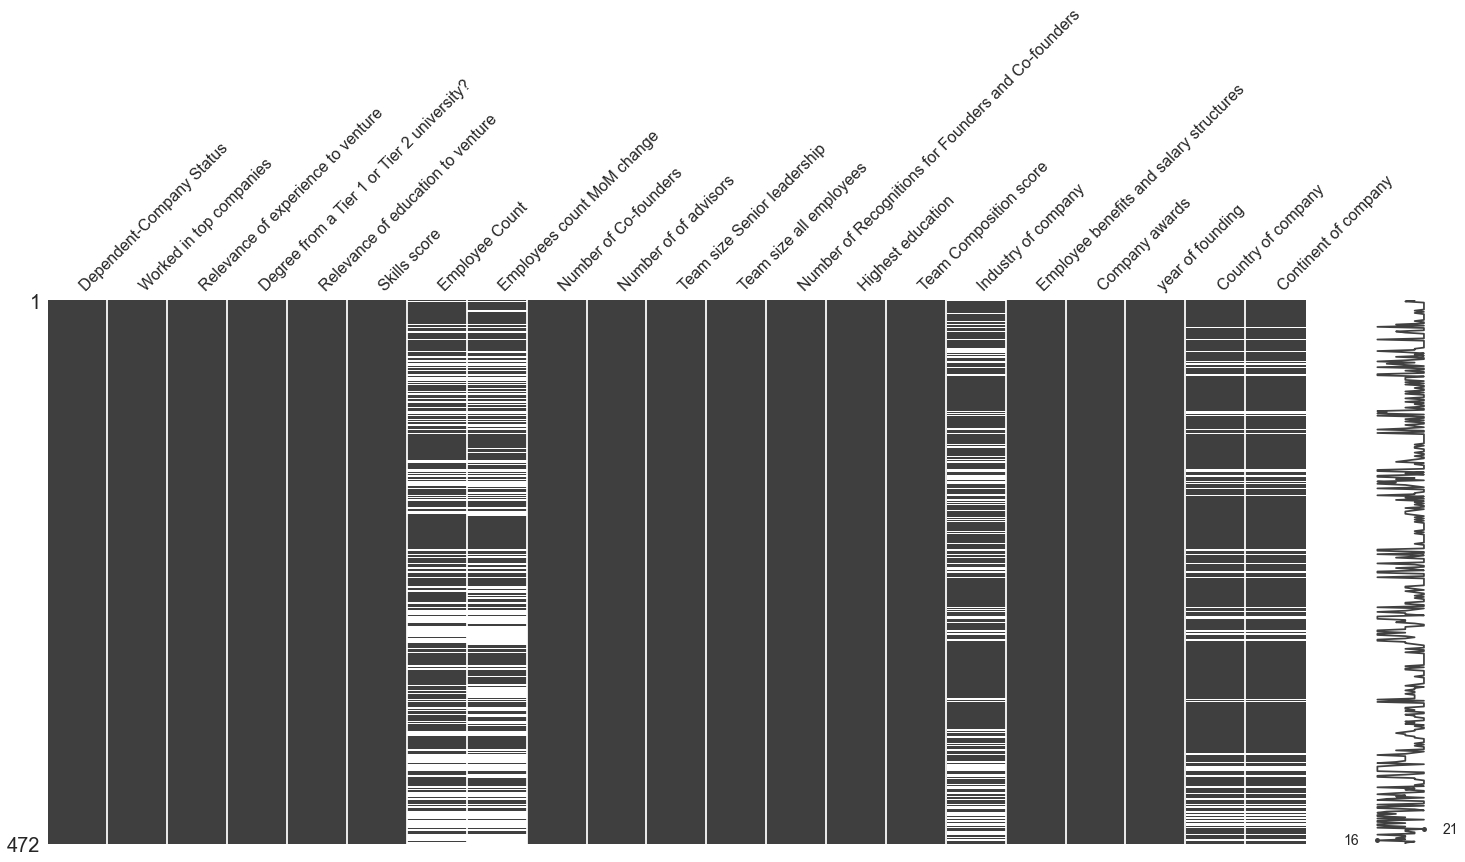

In [5]:
msno.matrix(df_final)

In [6]:
df.shape

(472, 116)

<AxesSubplot:>

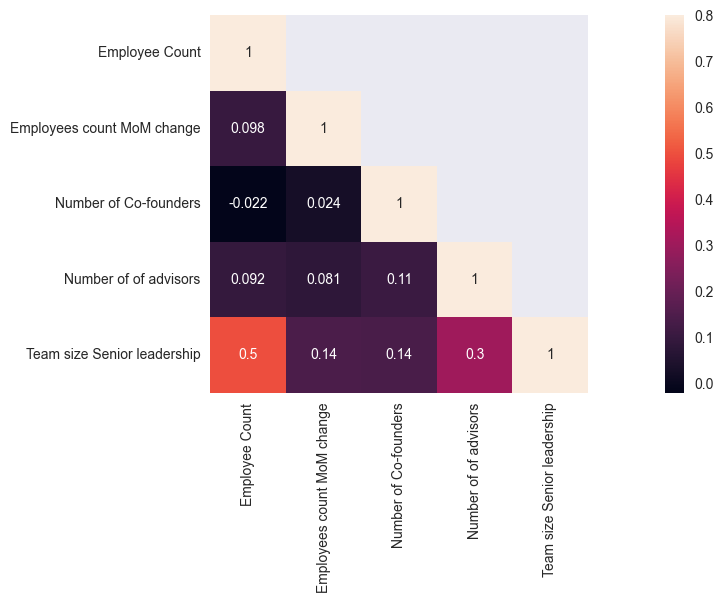

In [8]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["figure.dpi"] = 100 

corrMatt = df_final
corrMatt = corrMatt.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots() 
fig.set_size_inches(20,5)
sns.heatmap(corrMatt,mask = mask, vmax =.8, square = True, annot = True)

# 单变量分布

## Distribution

In [9]:
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Internet Activity Score,407.000000,114.159705,225.651419,-725.000000,-3.500000,60.000000,216.000000,1535.000000
Employee Count,306.000000,31.408497,62.673600,0.000000,4.250000,13.000000,31.000000,594.000000
Employees count MoM change,267.000000,-1.299625,23.967085,-100.000000,0.000000,0.000000,6.000000,50.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Co-founders,472.000000,1.868644,1.143481,0.000000,1.000000,2.000000,2.250000,7.000000
Number of of advisors,472.000000,1.016949,2.014736,0.000000,0.000000,0.000000,1.000000,13.000000
Team size Senior leadership,472.000000,3.730932,2.516539,1.000000,2.000000,3.000000,5.000000,24.000000
Industry trend in investing,390.000000,2.889744,0.845765,0.000000,2.000000,3.000000,3.000000,5.000000


## Dependent-Company Status

/Users/liuxingjian/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


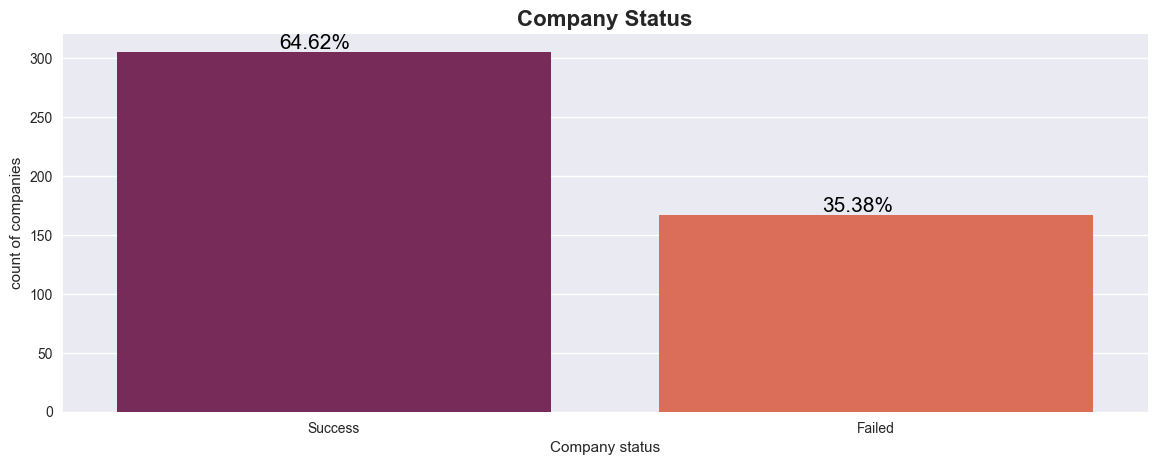

In [10]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["figure.dpi"] = 100  

plt.figure(figsize=(14,5))
ax=sns.countplot(df["Dependent-Company Status"],palette='rocket')
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.3, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

## year of funding

/Users/liuxingjian/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


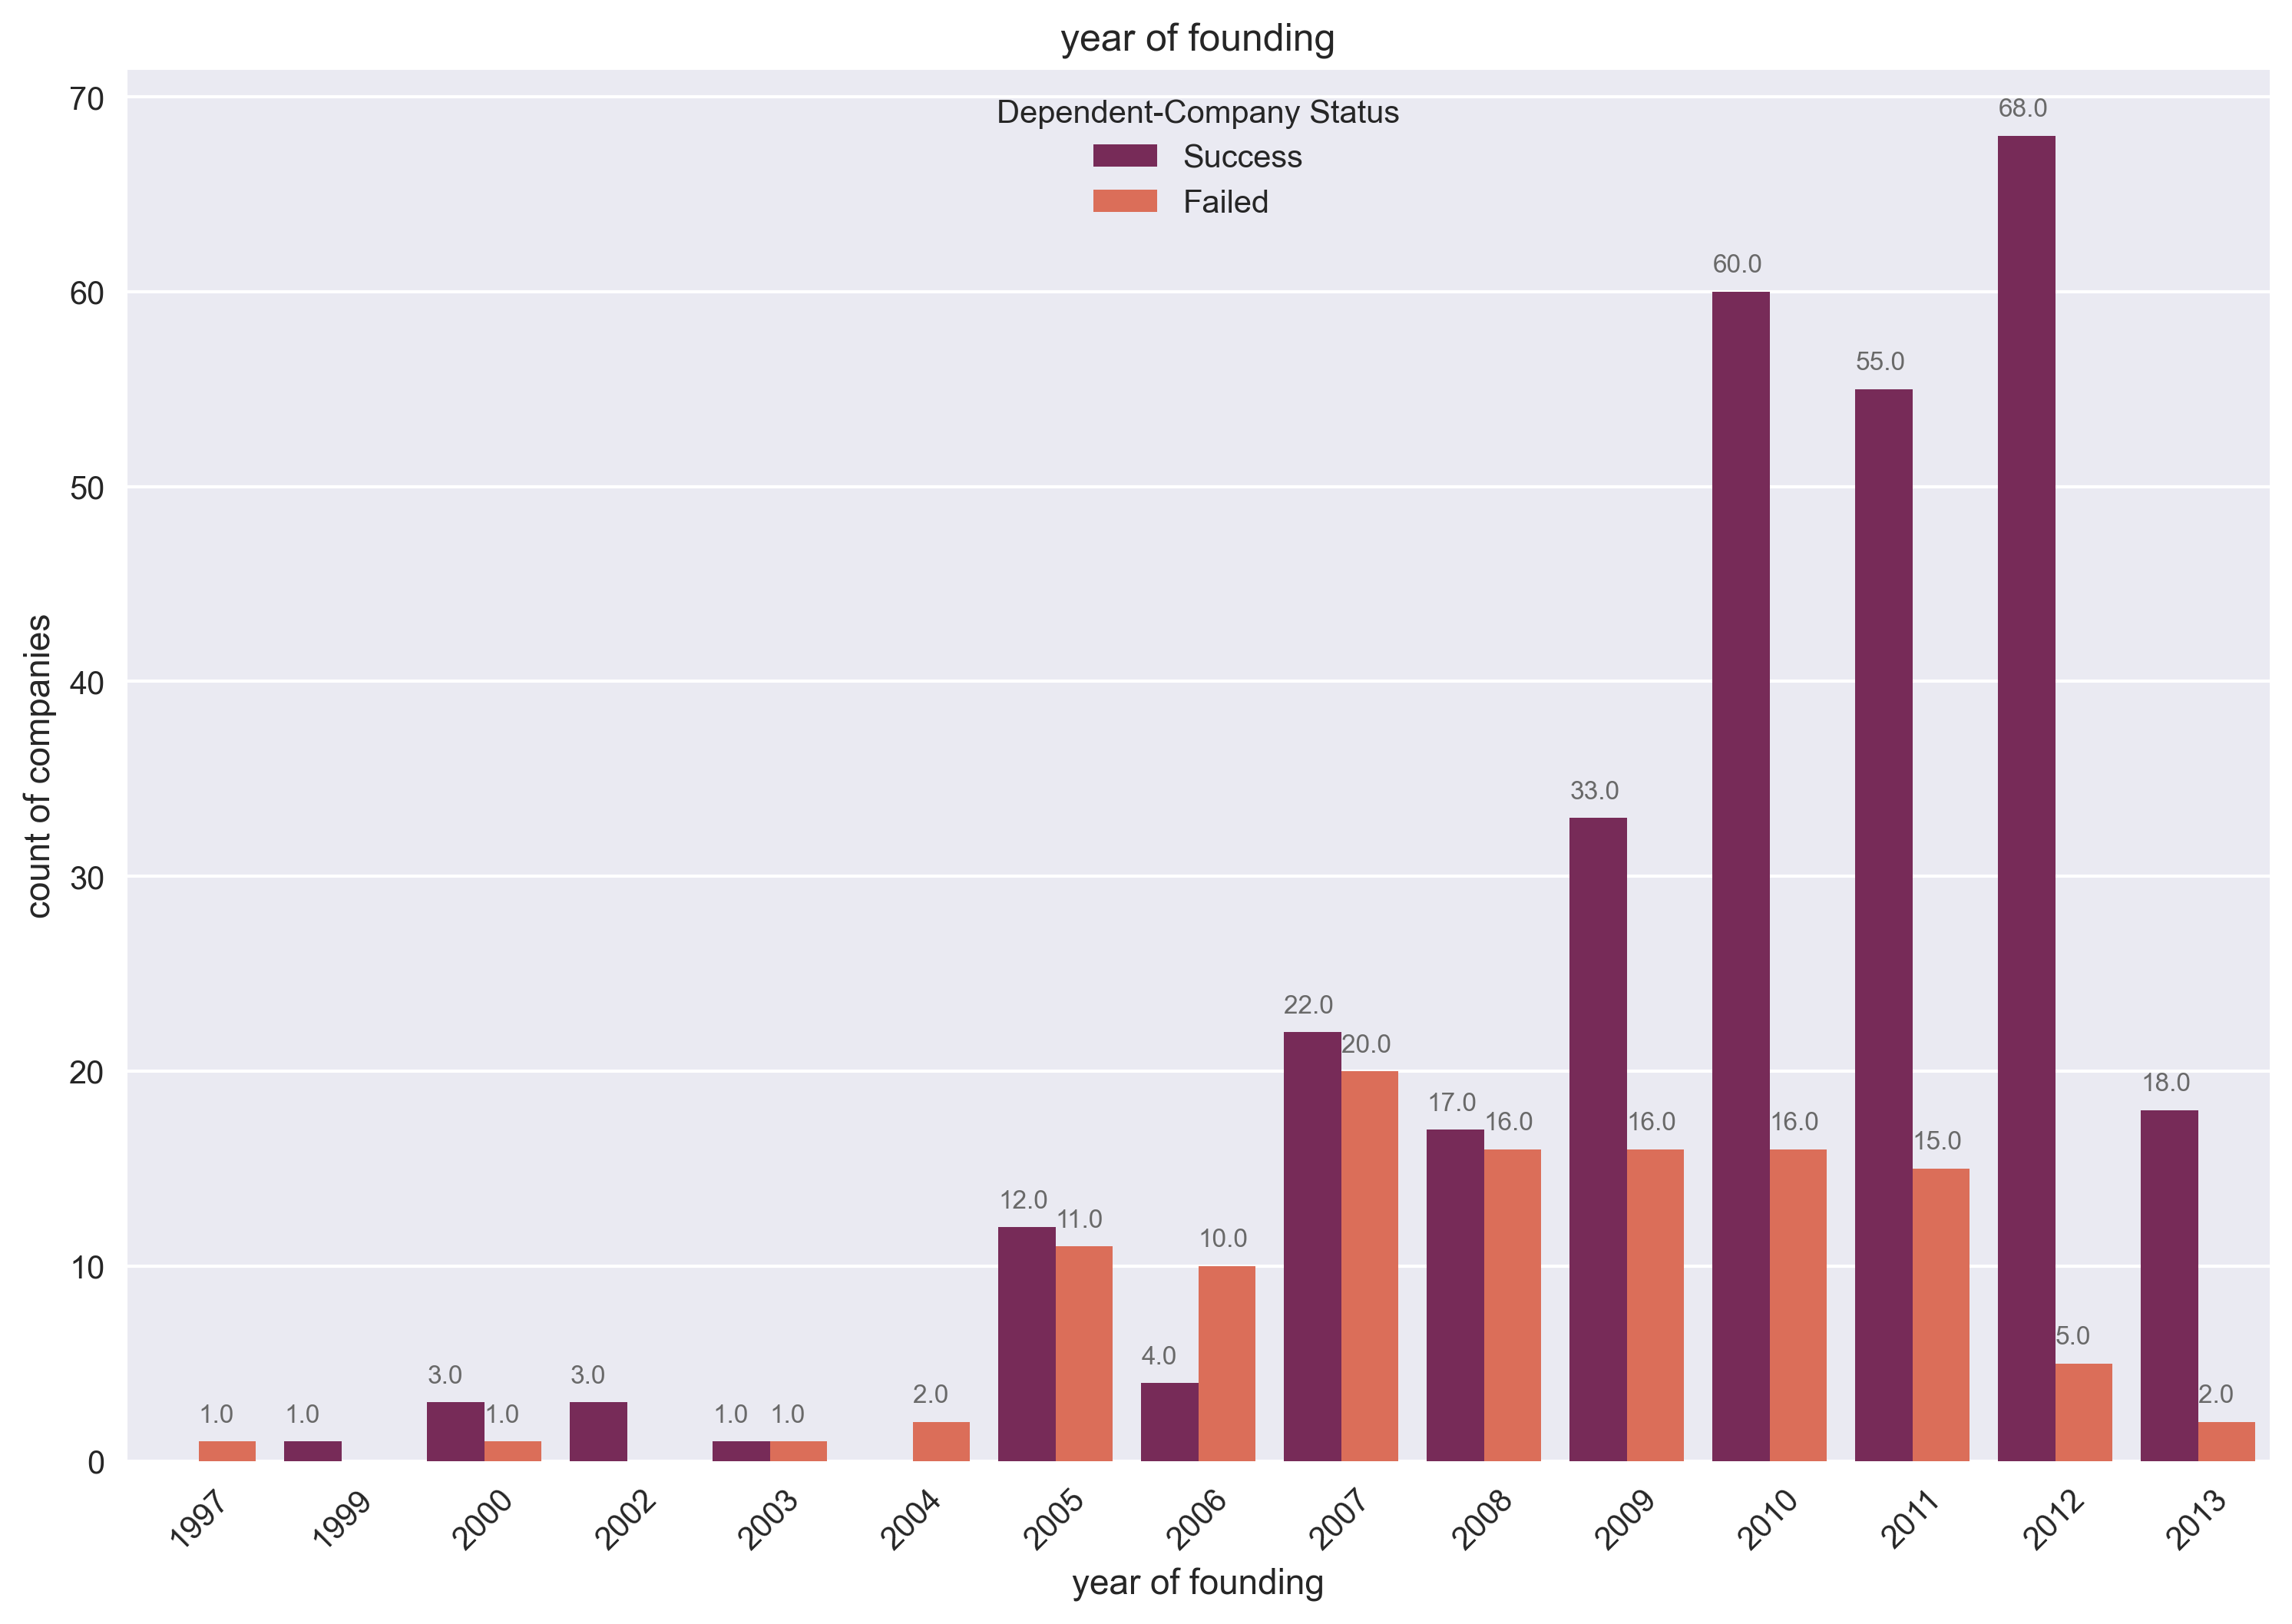

In [11]:
temp=df[df['year of founding'] != 'No Info']

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (15,4) 
plt.rcParams["figure.dpi"] = 300 

plt.figure(figsize=(12,8))
ax=sns.countplot(temp["year of founding"].astype(int),
                 hue=temp["Dependent-Company Status"],
                 palette='rocket')
plt.title("year of founding")
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1, \
            str(round((i.get_height()), 0)), fontsize=8, color='dimgrey')

([<matplotlib.patches.Wedge at 0x7f84c8664da0>,
 [Text(2.1892520639086035, 0.21719898865307888, '<2004'),
  Text(2.0989446972136565, 0.6591139188627961, '2006'),
  Text(1.8605639993260235, 1.174010904724464, '2013'),
  Text(1.3847216022759519, 1.709545578272285, '2005'),
  Text(0.5545705749980824, 2.128955489752263, '2008'),
  Text(-0.6830197486175127, 2.091287647120422, '2007'),
  Text(-1.8605639718463143, 1.174010948274107, '2009'),
  Text(-2.0723641826252464, -0.7384488435714386, '2011'),
  Text(-0.30857440998722013, -2.178252013312748, '2012'),
  Text(1.8424885004939617, -1.2021797392850677, '2010')],
 [Text(1.1941374894046928, 0.1184721756289521, '3.1%'),
  Text(1.1448789257529035, 0.3595166830160706, '3.4%'),
  Text(1.0148530905414672, 0.6403695843951621, '4.8%'),
  Text(0.7553026921505192, 0.9324794063303372, '5.6%'),
  Text(0.3024930409080449, 1.1612484489557797, '8.0%'),
  Text(-0.3725562265186433, 1.1407023529747755, '10.2%'),
  Text(-1.014853075552535, 0.6403696081495128, '1

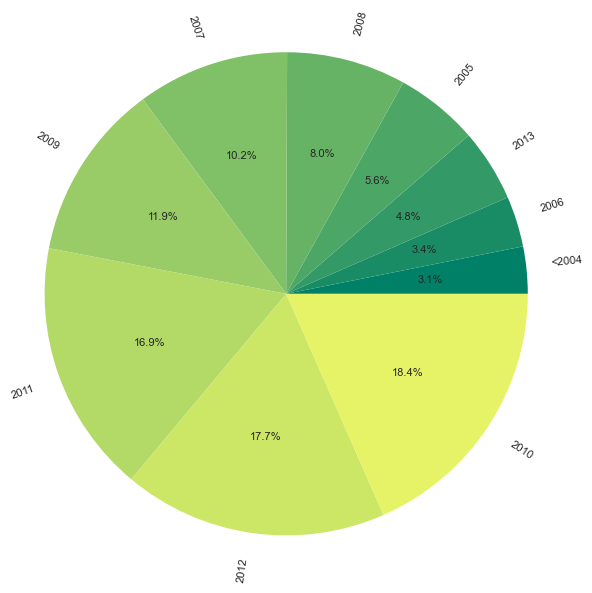

In [12]:
year_series=temp["year of founding"].astype(int)

year_count=[]
year_label=[]
sum04=0
for i in year_series:
    if i <= 2004:
        sum04+=1
year_count.append(sum04)
year_label.append('<2004')
for i in range(2005,2014,1):
    year_count.append(year_series.value_counts()[i])
    year_label.append(str(i))
# print(year_count,year_label)  

year_dict={}
for i in range(len(year_count)):
    year_dict[year_label[i]]=year_count[i]
# year_dict

year_dict_sorted=dict(sorted(year_dict.items(), key=lambda item: item[1]))
# year_dict_sorted

year_count_sorted=list(year_dict_sorted.values())
year_label_sorted=list(year_dict_sorted.keys())

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (15,3) 
plt.rcParams["figure.dpi"] = 100  

fig1, ax1 = plt.subplots(figsize=(5, 4))

theme = plt.get_cmap('summer')
ax1.set_prop_cycle("color", [theme(1. * i / len(year_label))
                             for i in range(len(year_label))])

ax1.pie(year_count_sorted,labels=year_label_sorted,autopct="%.1f%%", textprops={'fontsize': 8},
                                                    rotatelabels=True,
                                                    wedgeprops={'linewidth': 5},
                                                    radius=2)

## Country and Continent

/Users/liuxingjian/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


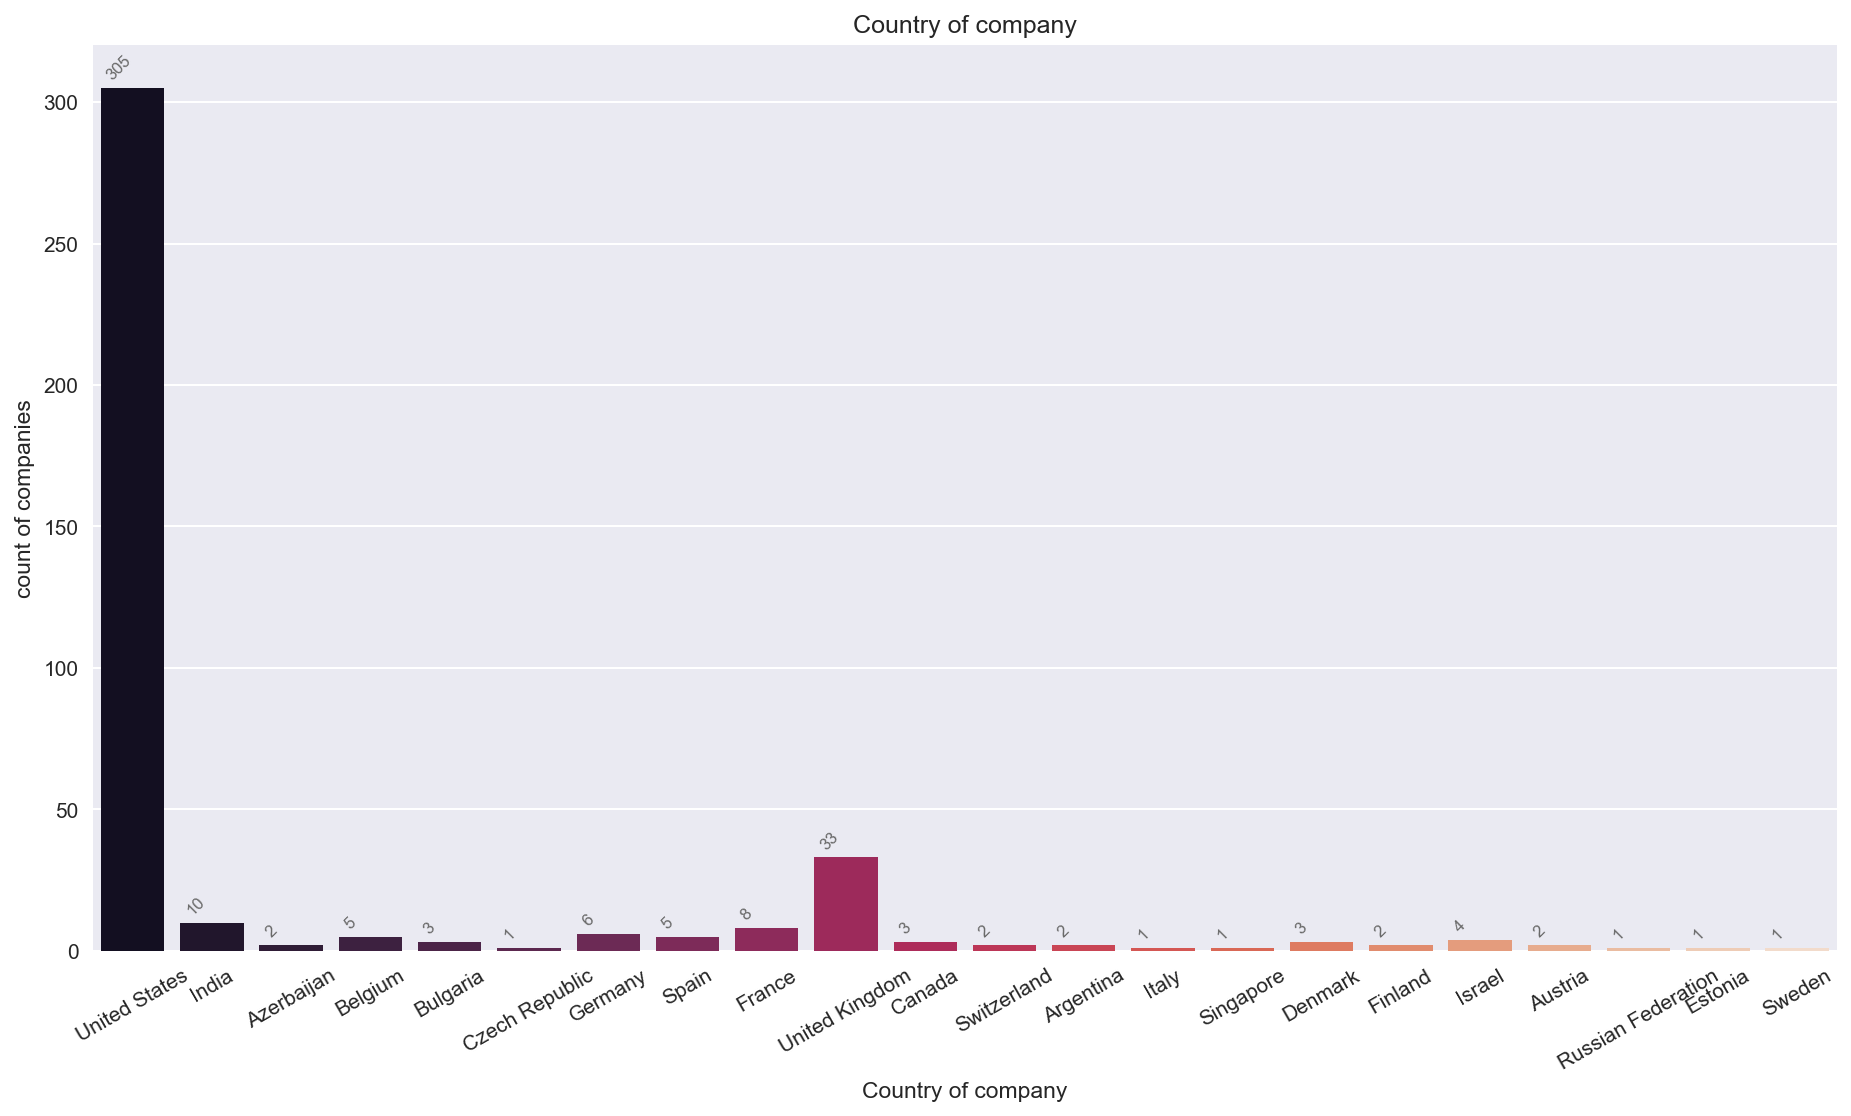

In [13]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (3,3) 
plt.rcParams["figure.dpi"] = 150  

plt.figure(figsize=(15,8))
ax=sns.countplot(df["Country of company"].dropna(),palette='rocket')
plt.title("Country of company")
plt.ylabel("count of companies")
plt.xticks(rotation=30)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=8, color='dimgrey',rotation=45
                )

([<matplotlib.patches.Wedge at 0x7f84c92af470>,
 [Text(-1.641437878805548, 1.4648145582367569, 'North America'),
  Text(1.432386747570414, -1.669810829221278, 'Europe'),
  Text(2.1756719018424437, -0.3262694829941739, 'Asia'),
  Text(2.19972994762016, -0.03446966119660657, 'South America')],
 [Text(-0.8953297520757533, 0.7989897590382309, '76.8%'),
  Text(0.7813018623111347, -0.9108059068479698, '19.0%'),
  Text(1.1867301282776963, -0.17796517254227665, '3.7%'),
  Text(1.1998526987019054, -0.018801633379967216, '0.5%')])

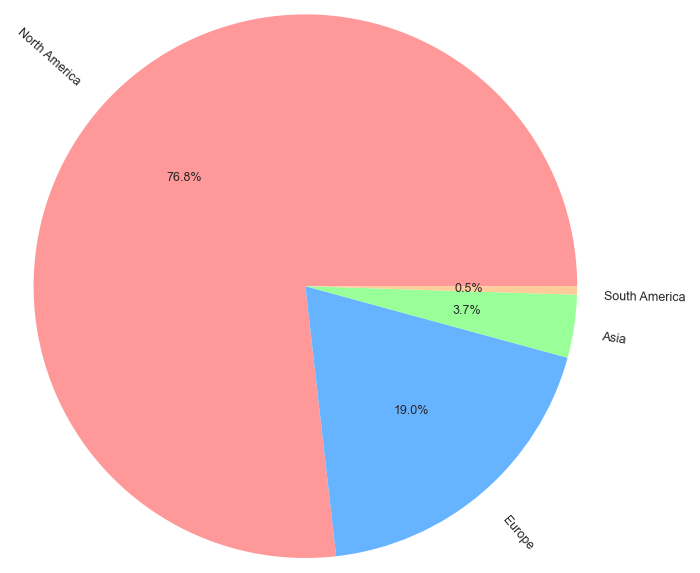

In [14]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (3,3) 
plt.rcParams["figure.dpi"] = 150 

plt.pie(df["Continent of company"].value_counts().values,
        labels=list(df["Continent of company"].value_counts().index)
        ,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        autopct="%.1f%%", textprops={'fontsize': 6},
                                                    rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2)

## Industry of company (Word Cloud)

Text(0.5, 1.0, 'Industry of Company')

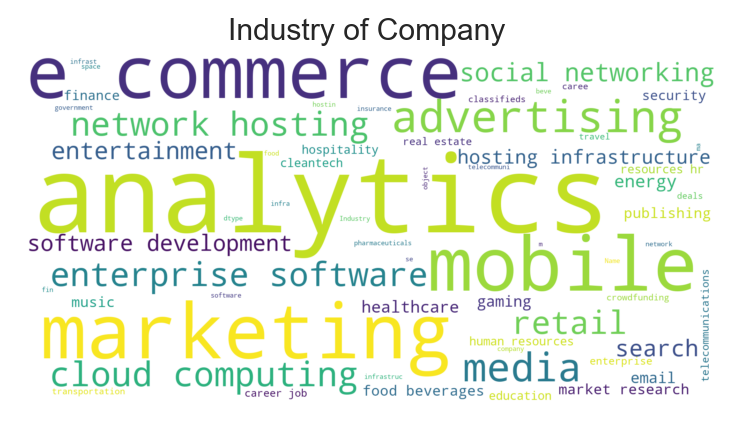

In [15]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (5,3) 
plt.rcParams["figure.dpi"] = 180  

text1=df["Industry of company"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
wordcloud1 = WordCloud(width=2000, height=1000,background_color='white').generate(str(text1))

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Industry of Company")

### Industry of succeeded company

Text(0.5, 1.0, 'Industry of Succeeded Company')

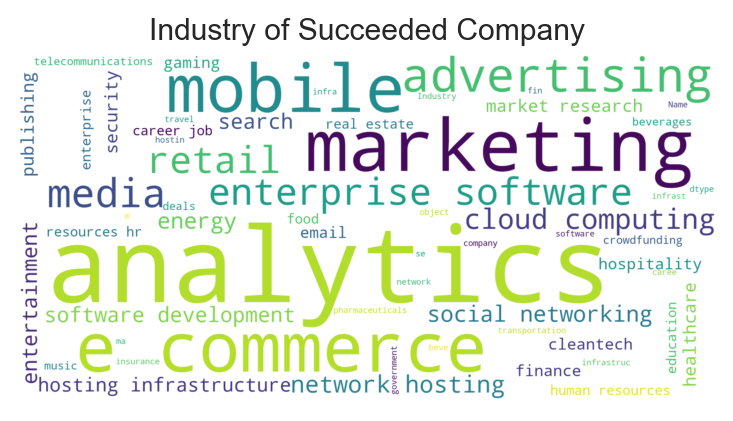

In [16]:
success=df[df['Dependent-Company Status']=="Success"]
text2 =success["Industry of company"].replace({"'":" "}).str.lower().dropna().drop_duplicates()

# Create and generate a word cloud image:
wordcloud2 = WordCloud(width=2000, height=1000,background_color='white').generate(str(text2))
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Industry of Succeeded Company")

###  Industry of failed company

(-0.5, 1999.5, 999.5, -0.5)

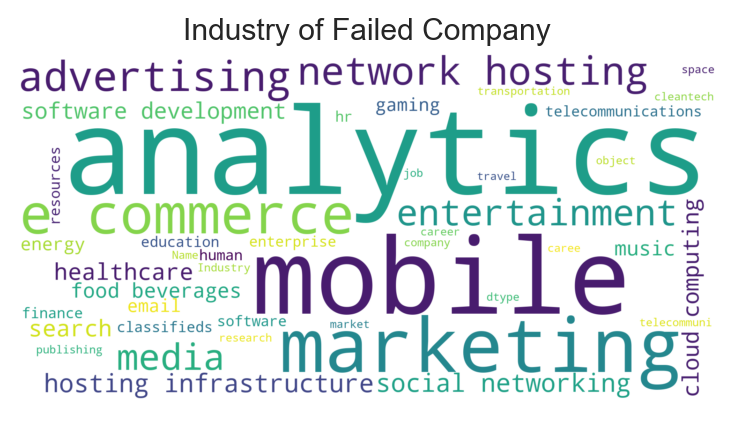

In [17]:
failed=df[df['Dependent-Company Status']=="Failed"]
text3 =failed["Industry of company"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
# Create and generate a word cloud image:
wordcloud3 = WordCloud(width=2000, height=1000,background_color='white').generate(str(text3))
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("Industry of Failed Company")
plt.axis("off")

# EDA

## 创业者画像

### has top company experience & has relevant working experience

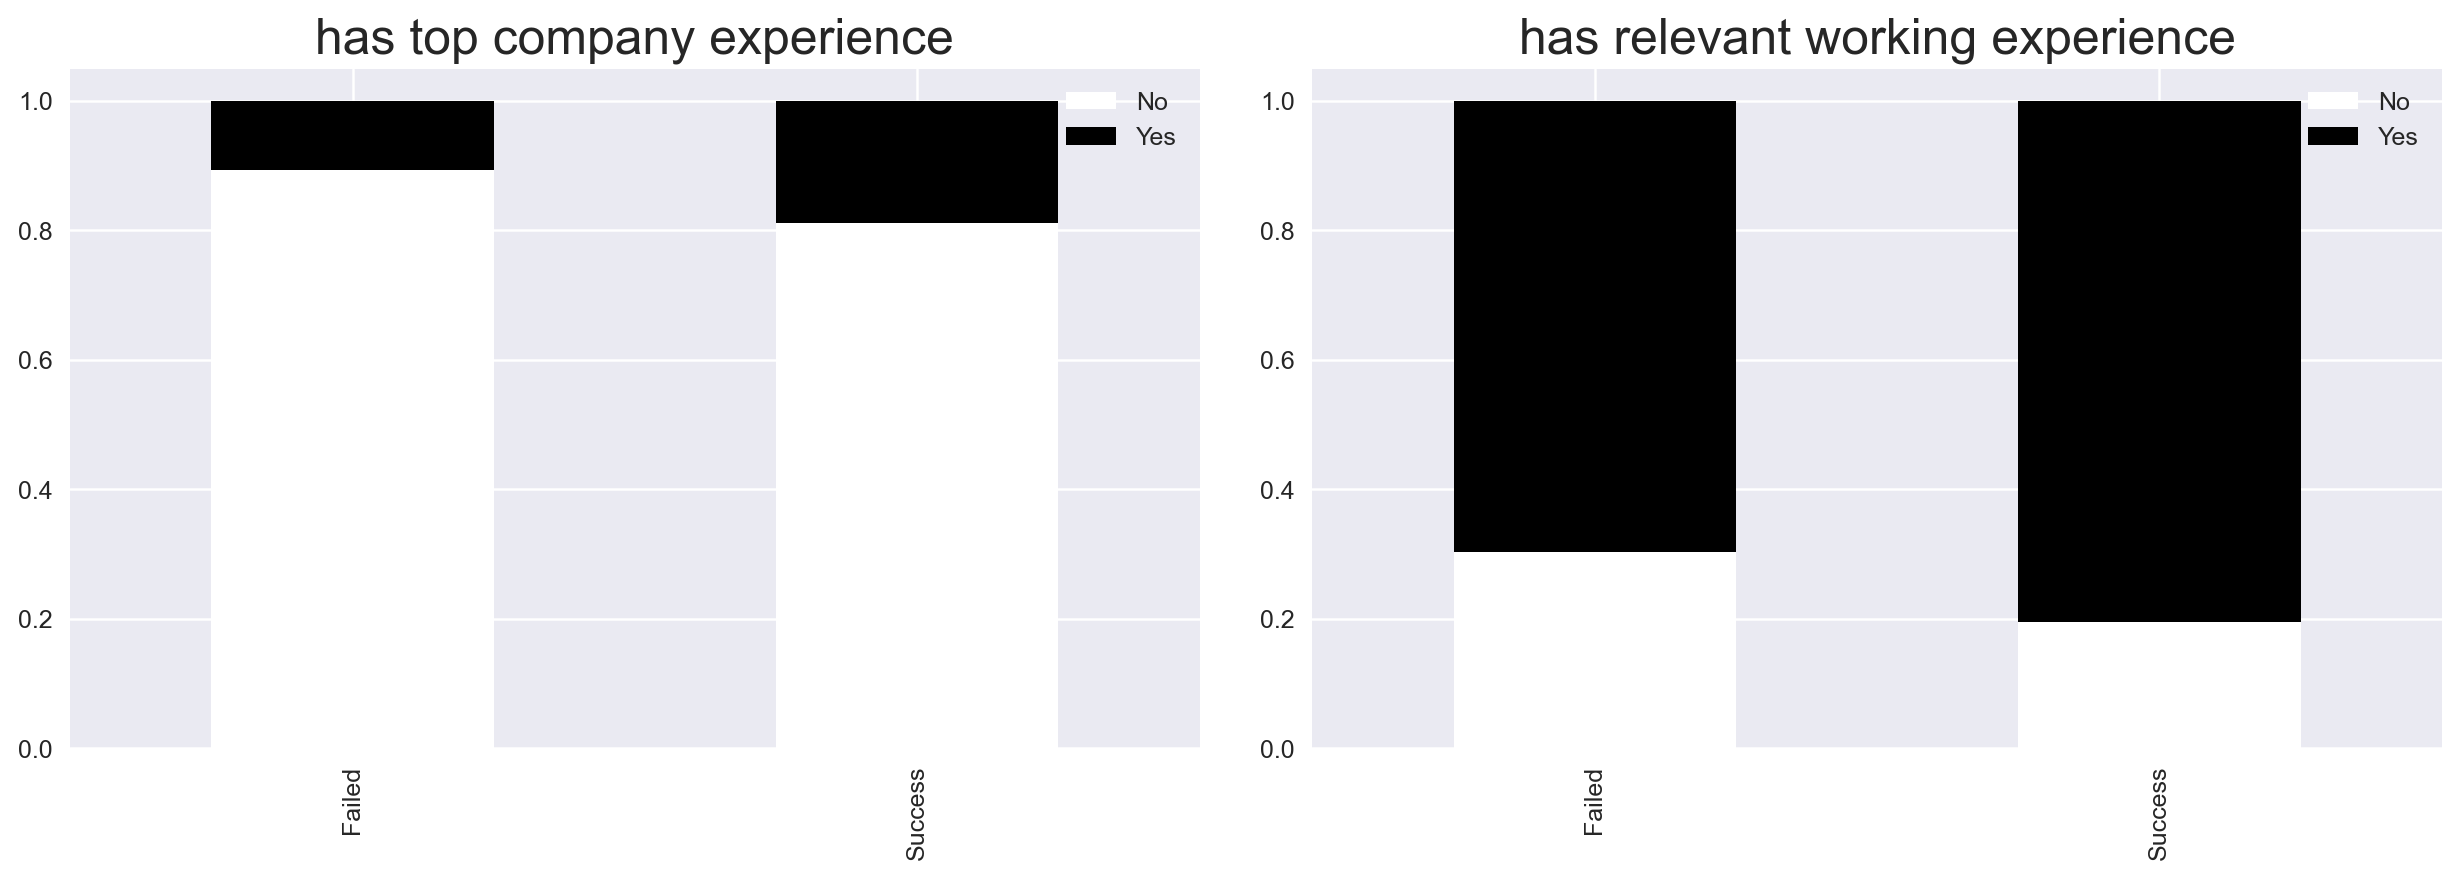

In [18]:
top_no = df.groupby(['Dependent-Company Status']).apply(
 lambda x: x[x['Worked in top companies'] == 'No']['Worked in top companies'])
top_yes = df.groupby(['Dependent-Company Status']).apply(
 lambda x: x[x['Worked in top companies'] == 'Yes']['Worked in top companies'])
top_no_yes = pd.DataFrame({'Failed': [134/150, 16/150],
 'Success': [246/303, 57/303], },
 index=['No', 'Yes']).T
relevance_no = df.groupby(['Dependent-Company Status']).apply(
 lambda x: x[x['Relevance of experience to venture'] == 'No']['Relevance of experience to venture'])
relevance_yes = df.groupby(['Dependent-Company Status']).apply(
 lambda x: x[x['Relevance of experience to venture'] == 'Yes'])['Relevance of experience to venture']
relevance_no_yes = pd.DataFrame({'Failed': [26/86, 60/86],
 'Success': [58/299, 241/299], },
 index=['No', 'Yes']).T

#对最高教育水平分布的可视化
# plt.rcParams["font.sans-serif"]=["SimHei"]#输出图像的标题可以为中文正常输出
plt.rcParams["axes.unicode_minus"]=False
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(17,5)
a = top_no_yes.plot(kind='bar', stacked=True, colormap='binary',ax = ax1)
a.legend(loc = 'upper right')
a.set_title('has top company experience',fontsize = 20)

b = relevance_no_yes.plot(kind='bar', stacked=True, colormap='binary',ax = ax2)
b.legend(loc = 'upper right')
b.set_title('has relevant working experience',fontsize = 20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

plt.show()

### Degree from a Tier 1 or Tier 2 university?

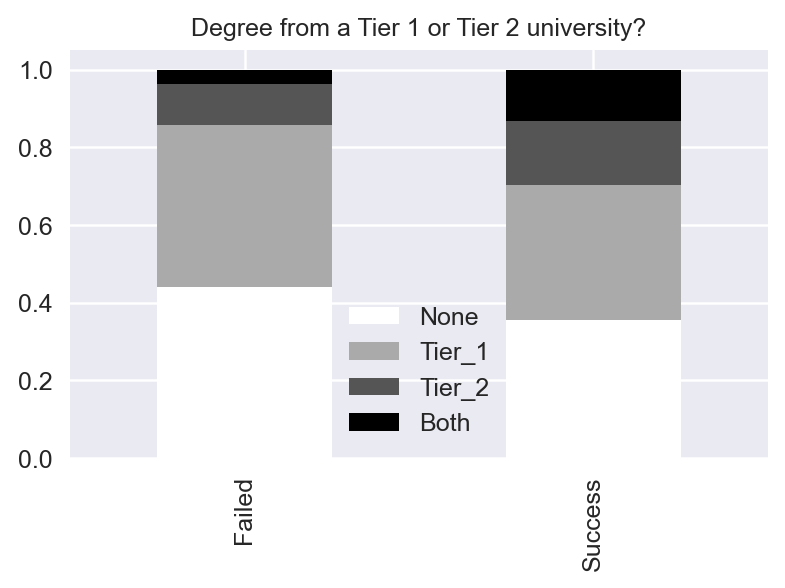

In [19]:
#数据准备
df.replace('No Info',np.nan,inplace = True)
edu_data = df[['Dependent-Company Status','Highest education','Years of education','Relevance of education to venture','Degree from a Tier 1 or Tier 2 university?']]
failure_edu = edu_data[edu_data['Dependent-Company Status'] == 'Failed']
success_edu = edu_data[edu_data['Dependent-Company Status'] == 'Success']
edu_dis = pd.DataFrame({'Failed':[37/84, 35/84,9/84,3/84],
                        'Success': [107/300,104/300,49/300,40/300] },index=['None', 'Tier_1','Tier_2','Both']).T



fail_time = failure_edu['Years of education'].dropna().values.astype(np.int32)
succ_time = success_edu['Years of education'].dropna().values.astype(np.int32)

fail_degree = failure_edu['Degree from a Tier 1 or Tier 2 university?'].dropna()
success_degree = success_edu['Degree from a Tier 1 or Tier 2 university?'].dropna()

#构建列联表
fail_sum = fail_degree.value_counts()
success_sum = success_degree.value_counts()
crosstab = pd.DataFrame({'Failed':fail_sum.values,'Success':success_sum.values},index = 
                       fail_sum.index)
c = edu_dis.plot(kind='bar', stacked=True, colormap='binary')
# c.legend(loc = 'lower right')
c.set_title('Degree from a Tier 1 or Tier 2 university?',fontsize = 10)
plt.show()

### Degree of Entrepreneur Comparision

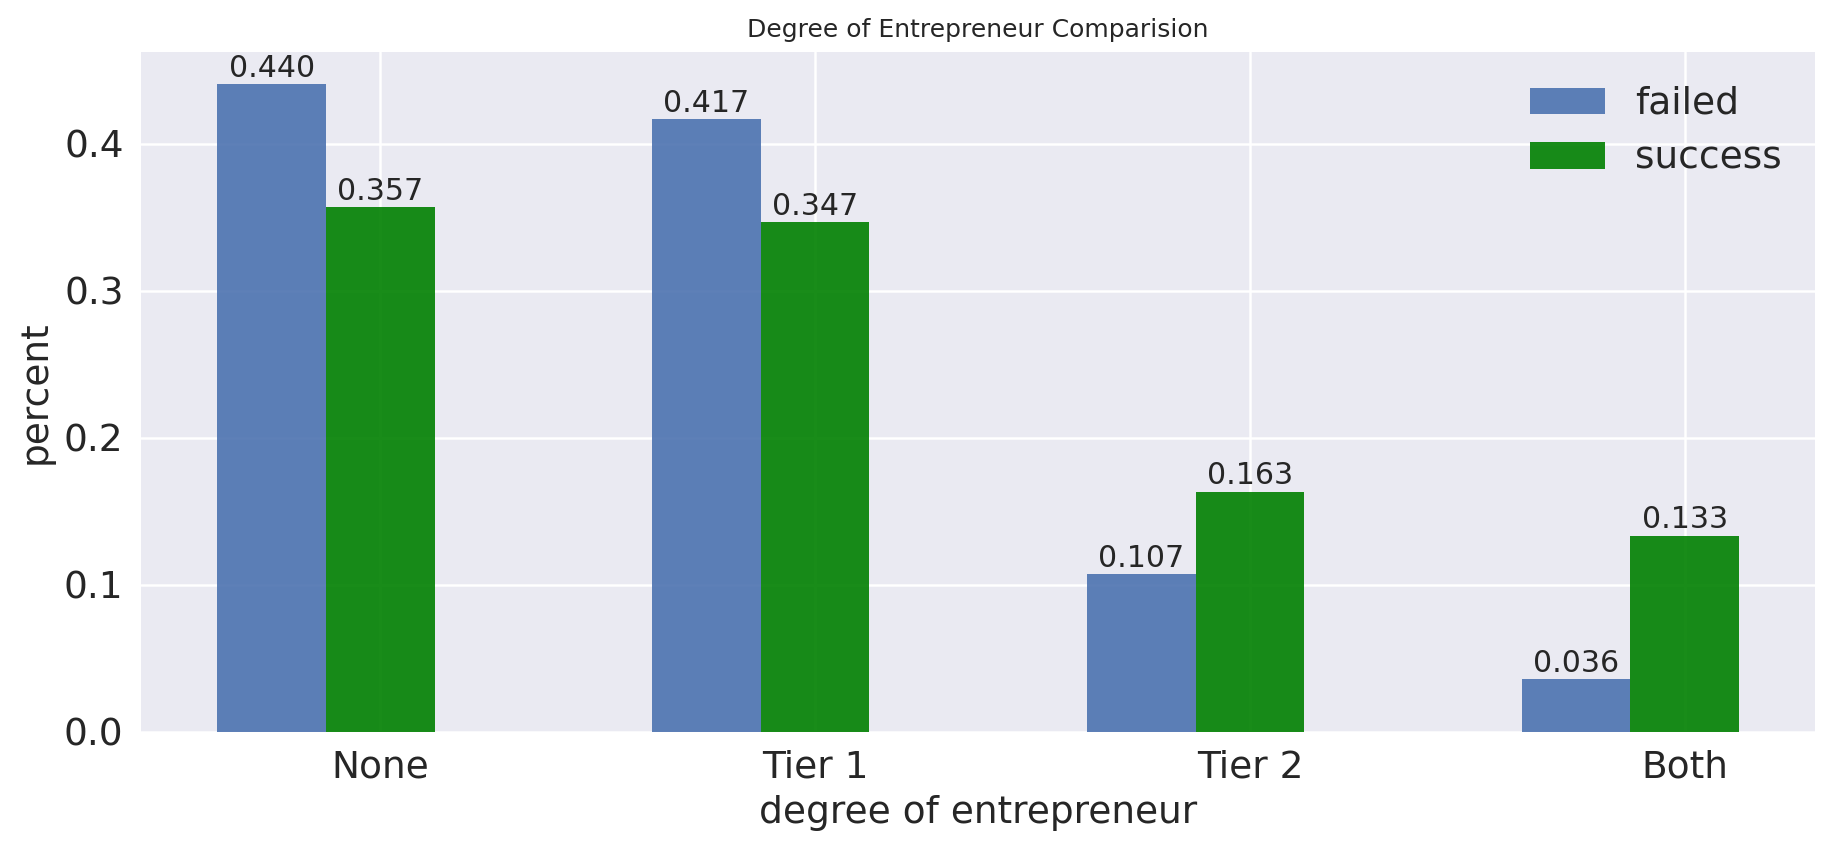

In [21]:
#对最高教育水平分布的可视化
plt.rcParams["font.sans-serif"]=["SimHei"]#输出图像的标题可以为中文正常输出
plt.rcParams["axes.unicode_minus"]=False

name = ['None','Tier 1','Tier 2','Both']
plt.figure(figsize=(12,5))
y1 = fail_degree.value_counts().values/sum(fail_degree.value_counts().values)
y2 = success_degree.value_counts().values/sum(success_degree.value_counts().values)
xt = np.arange(4)

width=0.25
plt.bar(xt-width/2,y1,width,alpha=0.9,label="failed")
plt.bar(xt+width/2,y2,width,alpha=0.9,tick_label = name,color="green",label="success")
for x,y in zip(xt,y1):
    plt.text(x-width/2,y+0.005,'%.3f'%y,ha="center",fontsize = 12)
for x,y in zip(xt,y2):
    plt.text(x+width/2,y+0.005,'%.3f'%y,ha="center",fontsize = 12)
plt.xlabel('degree of entrepreneur',fontsize = 15)
plt.ylabel('percent', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Degree of Entrepreneur Comparision',fontsize = 10)
plt.show()

### Skill Score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

Text(0.5, 1.0, 'Failed Company Skill Score')

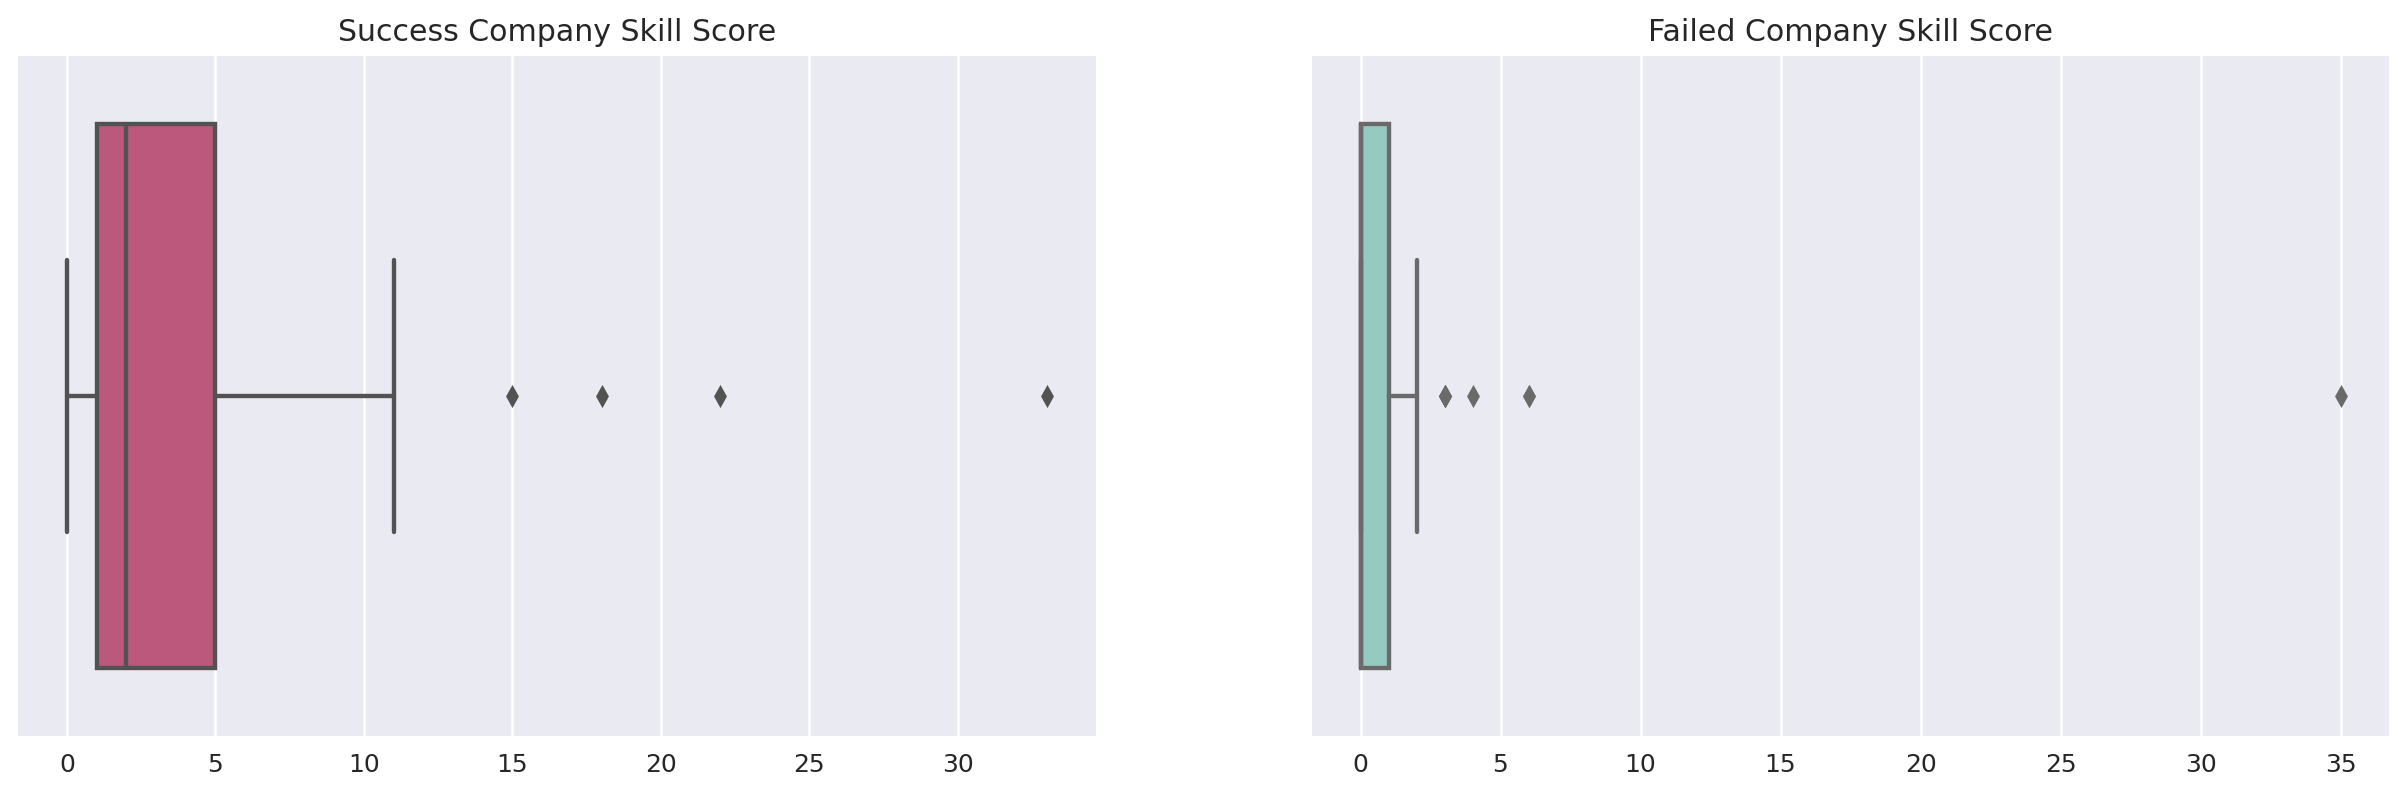

In [19]:
skills_score_Success = df.groupby(['Skills score']).apply(
 lambda x: x[x['Dependent-Company Status'] == 'Success'][['Dependent-Company Status']].count())
# skills_score_Success.drop('No info',axis=0)
skills_score_Failed = df.groupby(['Skills score']).apply(
 lambda x: x[x['Dependent-Company Status'] == 'Failed'][['Dependent-Company Status']].count())
skills_score_Failed.dropna(inplace = True)
skills_score_Success.dropna(inplace = True)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(17,5)
sns.boxplot(skills_score_Success['Dependent-Company Status'].values,
            ax=ax1,palette="plasma",orient='v').set_title('Success Company Skill Score')
sns.boxplot(skills_score_Failed['Dependent-Company Status'].values,
            ax=ax2,palette="Set3",orient='v').set_title('Failed Company Skill Score')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-pack

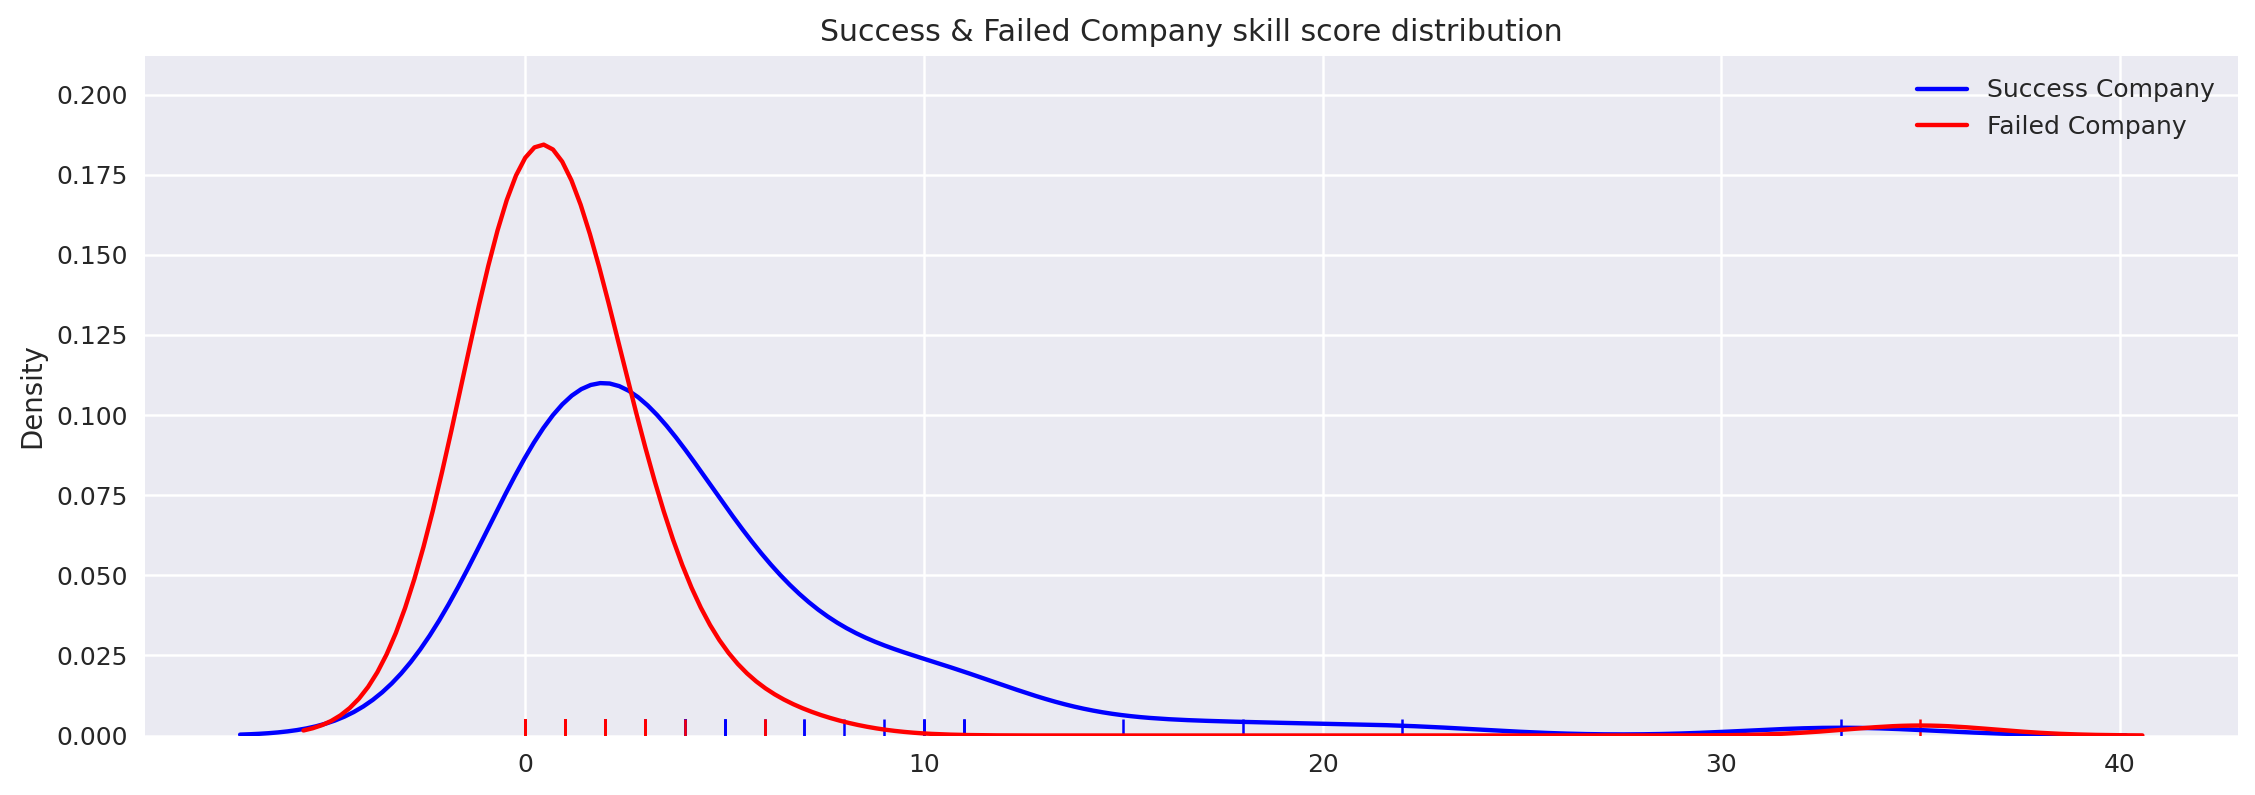

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(skills_score_Success['Dependent-Company Status'].values,hist=False,rug=True,
 color = 'blue',label = 'Success Company')
sns.distplot(skills_score_Failed['Dependent-Company Status'].values, hist=False, rug=True,
 color='red',label = 'Failed Company')
plt.title('Success & Failed Company skill score distribution')
plt.legend()
plt.show()

## 创业团队画像


### Comparing Different Sizes of Failed and Successful Companies

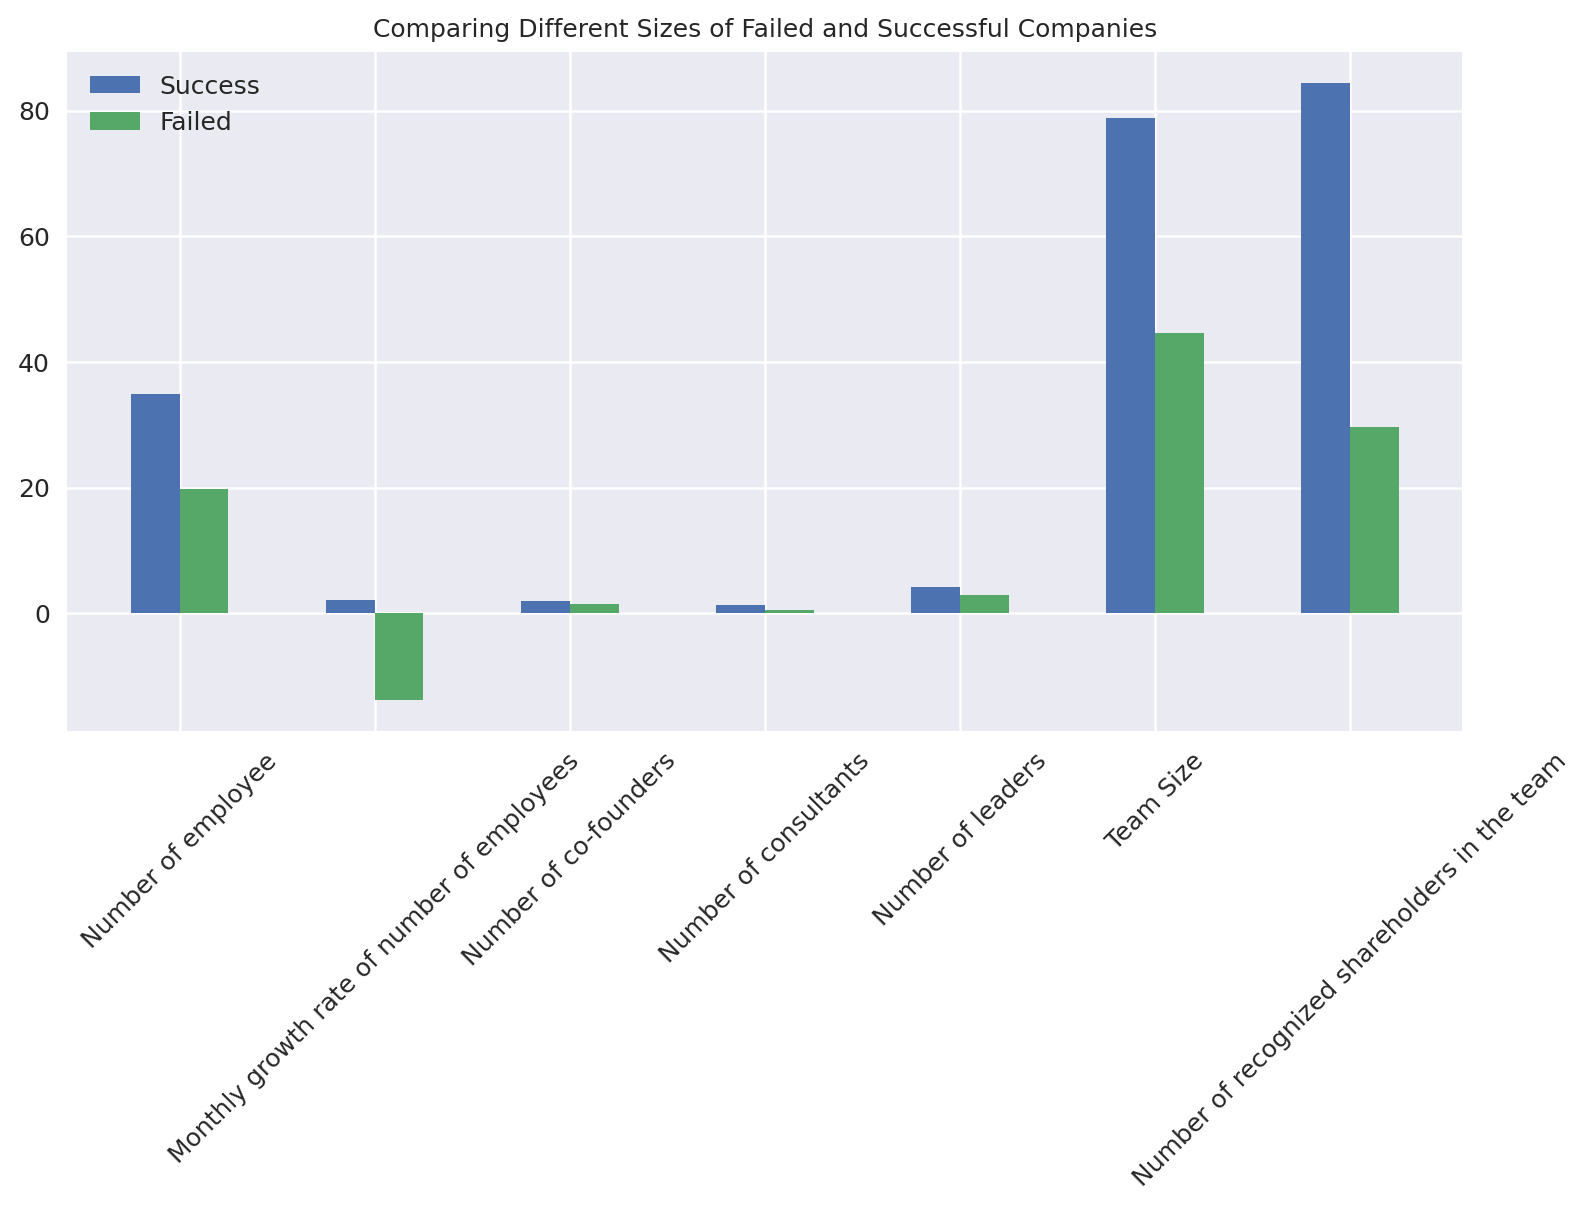

In [22]:
#绘制各个条件的柱状图
#数据准备
success_team = success_team.replace('No Info',np.nan)
fail_team = fail_team.replace('No Info',np.nan)
success_y = []
failure_y = []
columns = []
names = ['Number of employee','Monthly growth rate of number of employees',
         'Number of co-founders','Number of consultants','Number of leaders',
         'Team Size','Number of recognized shareholders in the team']
loc = [1,2,4,5,6,7,11]

for i in range(len(loc)):
    s = success_team.iloc[:,loc[i]].dropna().values.astype(np.float64)
    f = fail_team.iloc[:,loc[i]].dropna().values.astype(np.float64)
    success_y.append(sum(s)/len(s))
    failure_y.append(sum(f)/len(f))


#绘图
plt.figure(figsize=(10,5))
x = np.arange(len(loc))
width = 0.25
plt.bar(x - width/2, success_y, width, label='Success')
plt.bar(x + width/2, failure_y, width, label='Failed')
plt.xticks(x, labels=names,rotation = 45)
# plt.yticks(np.arange(-20,100,20),fontsize = 12)
plt.legend(fontsize = 10)
plt.title('Comparing Different Sizes of Failed and Successful Companies',fontsize = 10)
plt.show()

### Team composition score of Different companies

<Figure size 2700x1440 with 0 Axes>

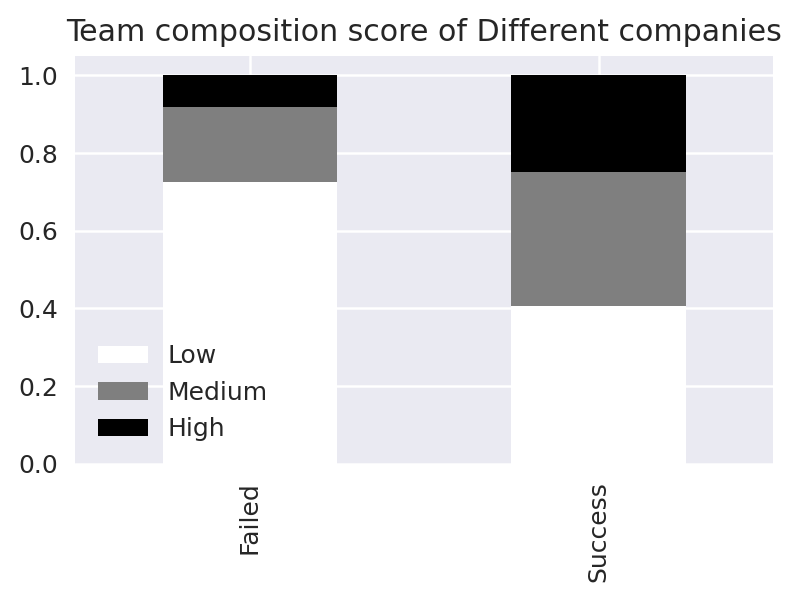

In [23]:
composition_score = pd.DataFrame({'Failed': [63/87, 17/87,7/87],
 'Success': [122/301, 104/301,75/301]},
 index=['Low', 'Medium','High']).T

plt.figure(figsize = (15,8))
composition_score.plot(kind='bar', 
                       stacked=True, 
                        colormap = 'binary').set(title = 'Team composition score of Different companies')

plt.show()

### Distribution of the highest education level of the team in different companies

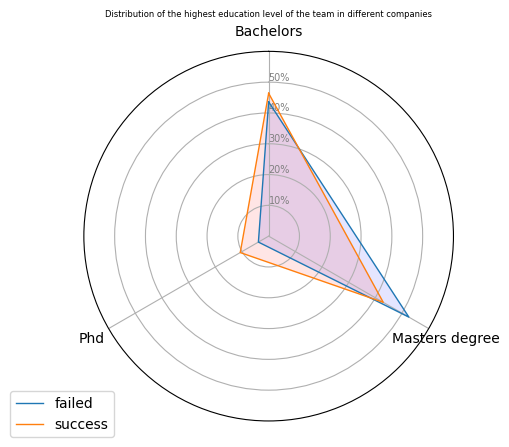

In [55]:
plt.style.use('default')
fail_dip = failure_edu['Highest education'].dropna()
success_dip = success_edu['Highest education'].dropna()

# ---------- 步骤1 创建背景

# number of variable
# 变量类别
categories = ['Bachelors','Masters degree','Phd']
# 变量类别个数
N = len(categories)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# 初始化极坐标网格
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
# 设置角度偏移
ax.set_theta_offset(pi / 2)
# 设置顺时针还是逆时针，1或者-1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
# 设置x轴的标签
plt.xticks(angles[:-1], categories)

# Draw ylabels
# 画标签
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30,40,50], ["10%", "20%", "30%",'40%','50%'], color="grey", size=7)
plt.ylim(0, 60)

# ---------- 步骤2 绘制数据

# 单独绘制每一组数据
# Ind1
values = fail_dip.value_counts().values
values[0],values[1] = values[1],values[0]
values = list(100*values/values.sum())
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="failed")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values = success_dip.value_counts().values
values = list(100*values/values.sum())
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="success")
ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
# 添加图例
plt.title("Distribution of the highest education level of the team in different companies",fontsize = 6)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

### Highest degree

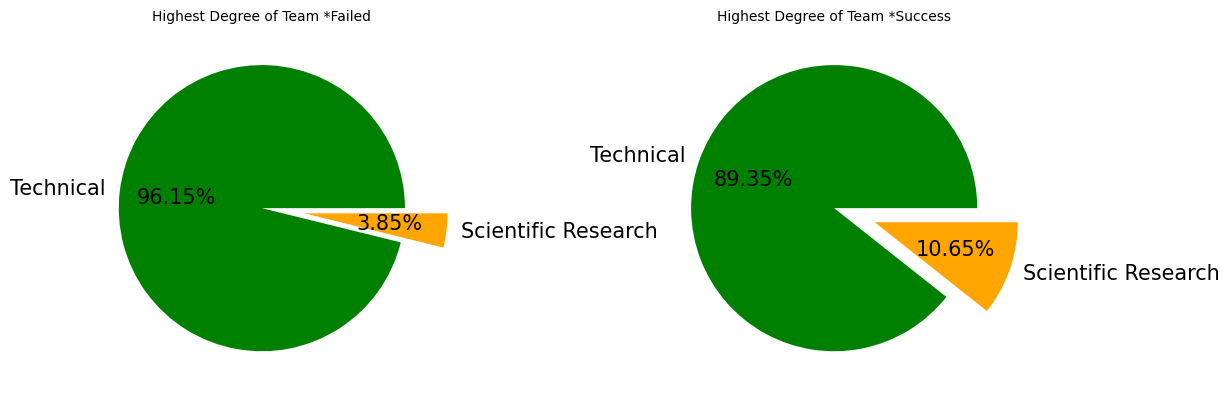

In [37]:
value1 = fail_dip.value_counts().values
value2 = success_dip.value_counts().values
fail_tec_keyan = np.array([value1[0]+value1[1],value1[2]])
success_tec_keyan = np.array([value2[0]+value2[1],value2[2]])
crosstab_dip = pd.DataFrame({'Failed':fail_tec_keyan,'Success':success_tec_keyan},index = ['技术型人才','科研型人才'])


#设置基本内容
plt.figure(figsize=(12,8))
names = ['Technical','Scientific Research']

plt.subplot(121)
plt.pie(x = crosstab_dip.loc[:,'Failed'].values,labels=names,autopct='%.2f%%',pctdistance=0.6,labeldistance=1.1,textprops={'fontsize': 15},
       colors=["green", "orange"],explode=(0,0.3))
plt.title('Highest Degree of Team *Failed',fontsize=10)

#右图
plt.subplot(122)
plt.pie(x =  crosstab_dip.loc[:,'Success'].values,labels=names,autopct='%.2f%%',pctdistance=0.6,labeldistance=1.1,textprops={'fontsize': 15},
       colors=["green","orange"],explode=(0,0.3))
plt.title('Highest Degree of Team *Success',fontsize=10)

#调整后显示
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None)
plt.show()

## 企业福利

### Employee benefits and salary structures

Text(0.5, 1.0, 'Employee benefits and salary structures')

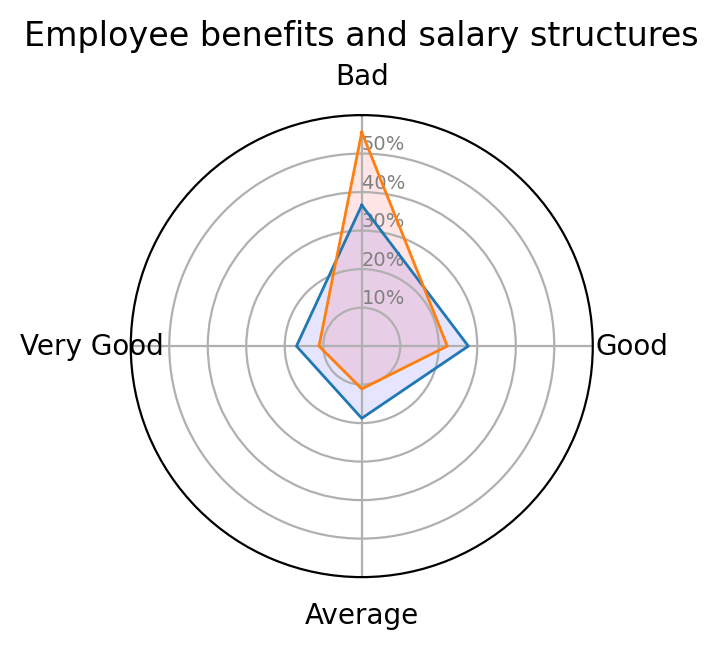

In [31]:
plt.style.use('default')

df3_1=df[["Dependent-Company Status",'Employee benefits and salary structures']]
df3_1.head()

df3_1['Employee benefits and salary structures'].value_counts()

df3_1=df3_1[df3_1['Employee benefits and salary structures']!='No Info']
df3_1['Employee benefits and salary structures'].value_counts()

success3=df3_1[df3_1['Dependent-Company Status']=="Success"]
fail3=df3_1[df3_1['Dependent-Company Status']=="Failed"]

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (5,3) 
plt.rcParams["figure.dpi"] = 200 

# ---------- 步骤1 创建背景

# number of variable
# 变量类别
categories = list(df3_1["Employee benefits and salary structures"].value_counts().index)
# 变量类别个数
N = len(categories)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# 初始化极坐标网格
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
# 设置角度偏移
ax.set_theta_offset(pi / 2)
# 设置顺时针还是逆时针，1或者-1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
# 设置x轴的标签
plt.xticks(angles[:-1], categories)

# Draw ylabels
# 画标签
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30,40,50], ["10%", "20%", "30%",'40%','50%'], color="grey", size=7)
plt.ylim(0, 60)

# ---------- 步骤2 绘制数据

# 单独绘制每一组数据
# Ind1
values = list(100*success3["Employee benefits and salary structures"].value_counts().values/
              success3["Employee benefits and salary structures"].value_counts().sum())
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="success")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values = list(100*fail3["Employee benefits and salary structures"].value_counts().values/
              fail3["Employee benefits and salary structures"].value_counts().sum())
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="failed")
ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
# 添加图例
plt.title("Employee benefits and salary structures")
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

## Company incentive awards

### Success company visualize with pie graph

([<matplotlib.patches.Wedge at 0x7fdcb320d7f0>,
 [Text(-1.6502442660085967, 1.4548862025965292, 'No'),
  Text(1.6502441979004556, -1.4548862798500377, 'Yes')],
 [Text(-0.900133236004689, 0.7935742923253795, '77.0%'),
  Text(0.9001331988547938, -0.7935743344636569, '23.0%')])

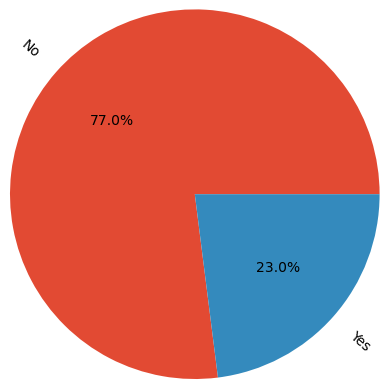

In [39]:
plt.style.use('ggplot')

df3_2=df[["Dependent-Company Status",'Company awards']]
df3_2=df3_2[df3_2['Company awards']!='No Info']

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (5,3) 
plt.rcParams["figure.dpi"] = 100  

success=df3_2[df3_2['Dependent-Company Status']=='Success']
plt.pie(success['Company awards'].value_counts().values,
        labels=success['Company awards'].value_counts().index,
                                                    autopct="%.1f%%", 
                                                    textprops={'fontsize': 10},
                                                    rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2,)

### Failed company visualize with pie graph

([<matplotlib.patches.Wedge at 0x7fdcb3135130>,
 [Text(-2.130090463404607, 0.5501950724177258, 'No'),
  Text(2.130090463404607, -0.550195072417726, 'Yes')],
 [Text(-1.1618675254934219, 0.3001064031369413, '92.0%'),
  Text(1.1618675254934219, -0.3001064031369414, '8.0%')])

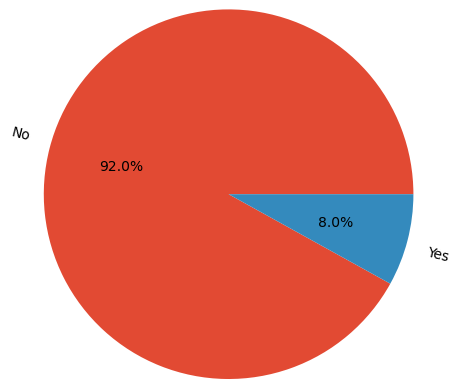

In [33]:
fail=df3_2[df3_2['Dependent-Company Status']=='Failed']

plt.pie(fail['Company awards'].value_counts().values,
        labels=fail['Company awards'].value_counts().index,
                                                    autopct="%.1f%%", 
                                                    textprops={'fontsize': 10},
                                                    rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2)
# plt.title('Failed Company Company Awards')